<a href="https://colab.research.google.com/github/zerotodeeplearning/covid-19-dataviz/blob/master/Covid_19_data_exploration_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Catalit LLC.

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Covid-19 data exploration with Pandas

Let's clone the 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16386 (delta 7), reused 10 (delta 5), pack-reused 16365
Receiving objects: 100% (16386/16386), 64.18 MiB | 39.93 MiB/s, done.
Resolving deltas: 100% (8106/8106), done.


## Data loading

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [0]:
df = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4


In [7]:
df.shape

(248, 69)

Let's do a little bit of data munging:
- drop `Lat` and `Long`
- aggregate by `Country/Region`
- transpose
- set the date as index

In [8]:
dfcountries = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum().transpose()

dfcountries.index = pd.to_datetime(dfcountries.index)

dfcountries.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,...,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0


## Selections and aggregations

In [10]:
dfcountries['Italy']

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-03-22    59138
2020-03-23    63927
2020-03-24    69176
2020-03-25    74386
2020-03-26    80589
Name: Italy, Length: 65, dtype: int64

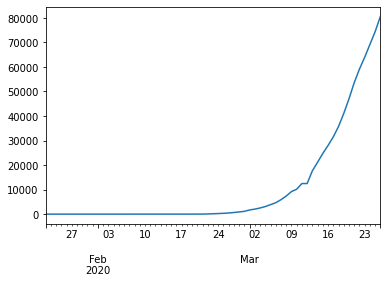

In [105]:
dfcountries['Italy'].plot();

Let's make it a little prettier

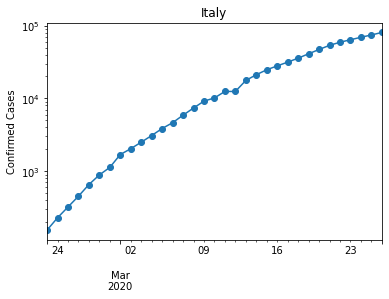

In [28]:
series = dfcountries['Italy']
series[series > 100].plot(style='o-', logy=True, title='Italy')
plt.ylabel('Confirmed Cases');

### Exercise 1: Python functions

- Encapsulate the code above into a function with the signature:

  ```python
  def plot_country(country, min_cases=100, logy=True):
    ...
    ...
  ```
  that plots the data for an arbitrary country.
- Use the function to plot a few countries
- Bonus points if you add a legend

```
# This is formatted as code
```



In [0]:
## your code here
def plot_country(country, min_cases=100, logy=True):
  series = dfcountries[country]
  series[series > min_cases].plot(style='o-', logy=logy, title=country)
  plt.ylabel('Confirmed Cases');

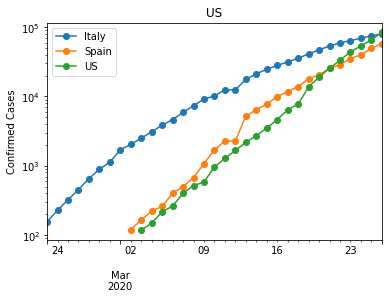

In [31]:
plot_country('Italy')
plot_country('Spain')
plot_country('US')
plt.legend(['Italy', 'Spain', 'US']);

## Number of cases

In [46]:
total_cases = dfcountries.tail(1).transpose()
total_cases

,2020-03-26
Country/Region,
Afghanistan,94
Albania,174
Algeria,367
Andorra,224
Angola,4
...,...
Venezuela,107
Vietnam,153
West Bank and Gaza,84


In [76]:
last_date = total_cases.columns[0]
print_date = last_date.strftime("%B %d, %Y")
print_date

'March 26, 2020'

In [74]:
top_countries = total_cases[last_date].sort_values(ascending=False).head(20)
top_countries

Country/Region
US                83836
China             81782
Italy             80589
Spain             57786
Germany           43938
France            29551
Iran              29406
United Kingdom    11812
Switzerland       11811
Korea, South       9241
Netherlands        7468
Austria            6909
Belgium            6235
Canada             4042
Turkey             3629
Portugal           3544
Norway             3369
Brazil             2985
Sweden             2840
Australia          2810
Name: 2020-03-26 00:00:00, dtype: int64

### Exercise 2: Pandas bar plot

- Use the `.plot()` method from Pandas to display the number of cases in the top 20 countries with a horizontal bar chart.
- Bonus points if you add a title
- Bonus point if you sort the bars in decreasing order from top to bottom


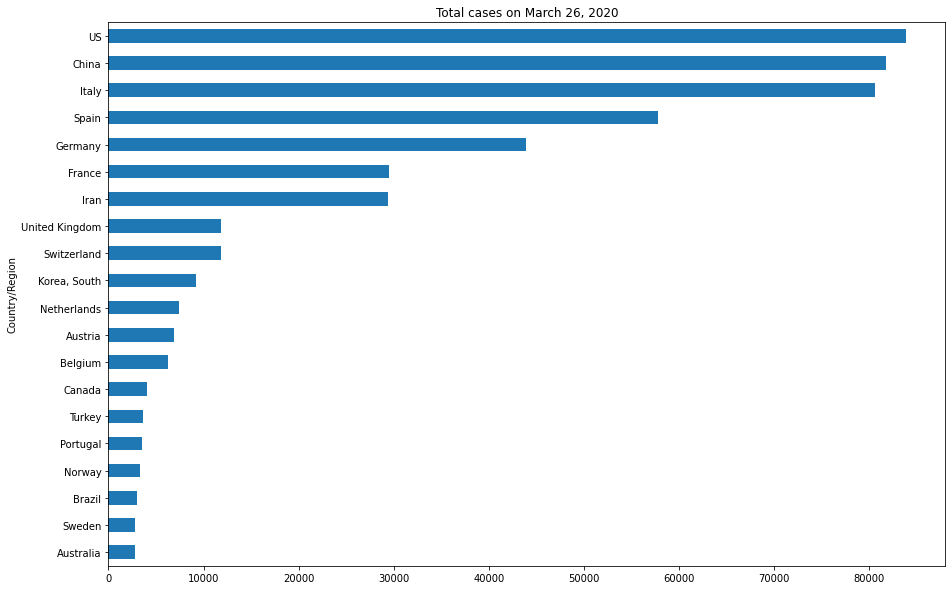

In [79]:
## your code here
top_countries.sort_values().plot(kind='barh', title=f'Total cases on {print_date}', figsize=(15, 10));

## New cases

### Exercise 3: New cases

- Pick a country of your choice and define a variable called `country`
- Select the corresponding column in `dfcountries`
- Use the `.diff()` method to define a Pandas Series that contains the new daily cases. Call it `ts`.
- Filter out the rows with 0 new cases

In [0]:
## your code here
country = 'Italy'
ts = dfcountries[country].diff()
ts = ts[ts>0]

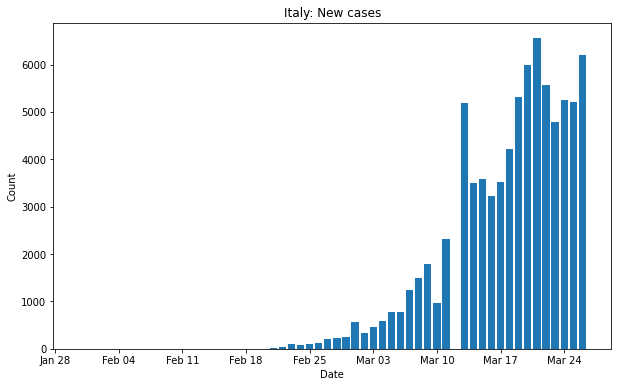

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(ts.index, ts.values)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title(f'{country}: New cases')
ax.set_ylabel('Count')
ax.set_xlabel('Date');

## Comparison top 10

In [93]:
dftopcountries = dfcountries[top_countries.index[:10]]
dftopcountries.head()

Country/Region,US,China,Italy,Spain,Germany,France,Iran,United Kingdom,Switzerland,"Korea, South"
2020-01-22,1,548,0,0,0,0,0,0,0,1
2020-01-23,1,643,0,0,0,0,0,0,0,1
2020-01-24,2,920,0,0,0,2,0,0,0,2
2020-01-25,2,1406,0,0,0,3,0,0,0,2
2020-01-26,5,2075,0,0,0,3,0,0,0,3


In [0]:
min_cases = 500

In [98]:
df_realigned = dftopcountries[dftopcountries > min_cases].dropna(how='all').reset_index(drop=True)
df_realigned

Country/Region,US,China,Italy,Spain,Germany,France,Iran,United Kingdom,Switzerland,"Korea, South"
0,NaN,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
60,33276.0,81435,59138.0,28768.0,24873.0,16243.0,21638.0,5745.0,7474.0,8961.0
61,43847.0,81498,63927.0,35136.0,29056.0,20123.0,23049.0,6726.0,8795.0,8961.0
62,53740.0,81591,69176.0,39885.0,32986.0,22622.0,24811.0,8164.0,9877.0,9037.0
63,65778.0,81661,74386.0,49515.0,37323.0,25600.0,27017.0,9640.0,10897.0,9137.0


### Exercise 4
Iterate over the columns in `df_realigned` and shift the values up eliminating the null values in such a way that each country's time-series starts at the first row. This is not easy and there are multiple ways to solve this exercise.

The goal is to obtain a DataFrame that looks like this:

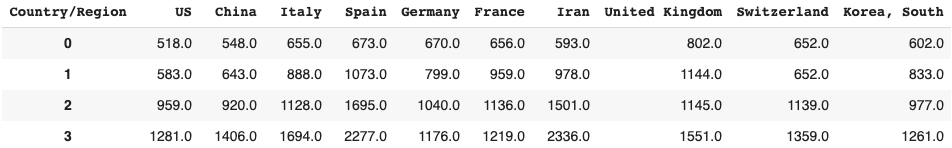

In [99]:
## your code here
for c in df_realigned:
    temp = df_realigned[c].dropna().values
    df_realigned[c] = np.nan
    df_realigned.loc[:len(temp)-1, c]= temp

df_realigned = df_realigned.iloc[:30]
df_realigned

Country/Region,US,China,Italy,Spain,Germany,France,Iran,United Kingdom,Switzerland,"Korea, South"
0,518.0,548.0,655.0,673.0,670.0,656.0,593.0,802.0,652.0,602.0
1,583.0,643.0,888.0,1073.0,799.0,959.0,978.0,1144.0,652.0,833.0
2,959.0,920.0,1128.0,1695.0,1040.0,1136.0,1501.0,1145.0,1139.0,977.0
3,1281.0,1406.0,1694.0,2277.0,1176.0,1219.0,2336.0,1551.0,1359.0,1261.0
4,1663.0,2075.0,2036.0,2277.0,1457.0,1794.0,2922.0,1960.0,2200.0,1766.0
5,2179.0,2877.0,2502.0,5232.0,1908.0,2293.0,3513.0,2642.0,2200.0,2337.0
6,2727.0,5509.0,3089.0,6391.0,2078.0,2293.0,4747.0,2716.0,2700.0,3150.0
7,3499.0,6087.0,3858.0,7798.0,3675.0,3681.0,5823.0,4014.0,3028.0,3736.0
8,4632.0,8141.0,4636.0,9942.0,4585.0,4496.0,6566.0,5067.0,4075.0,4335.0
9,6421.0,9802.0,5883.0,11748.0,5795.0,4532.0,7161.0,5745.0,5294.0,5186.0


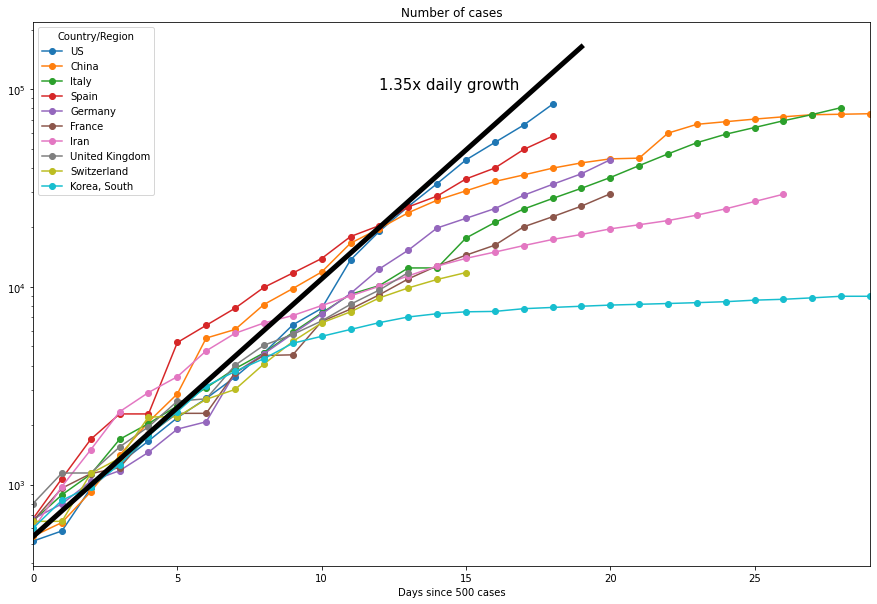

In [146]:
x = np.arange(20)
y = 1.35**(x+21)

df_realigned.plot(logy=True, figsize=(15, 10), style='o-', title="Number of cases")
plt.xlabel("Days since 500 cases")
plt.plot(x, y, c='black', linewidth=5)
plt.text(12, 1e5, "1.35x daily growth", fontsize=15);

### Exercise 5: What can you do to help minimize the impact of COVID-19?

In [0]:
## your code here

- Wash your hand
- Shelter in place
- Use your time well
- Put your skills at the service of others